In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer
from warnings import simplefilter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
test_set=pd.read_csv('gold_recovery_test.csv')
train_set=pd.read_csv('gold_recovery_train.csv')
data=pd.read_csv('gold_recovery_full.csv')

In [3]:
print(test_set.head(10))

                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   
5  2016-09-01 05:59:59                     168.485085   
6  2016-09-01 06:59:59                     144.133440   
7  2016-09-01 07:59:59                     133.513396   
8  2016-09-01 08:59:59                     133.735356   
9  2016-09-01 09:59:59                     126.961069   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4           

In [4]:
print(train_set)

                      date  final.output.concentrate_ag  \
0      2016-01-15 00:00:00                     6.055403   
1      2016-01-15 01:00:00                     6.029369   
2      2016-01-15 02:00:00                     6.055926   
3      2016-01-15 03:00:00                     6.047977   
4      2016-01-15 04:00:00                     6.148599   
...                    ...                          ...   
16855  2018-08-18 06:59:59                     3.224920   
16856  2018-08-18 07:59:59                     3.195978   
16857  2018-08-18 08:59:59                     3.109998   
16858  2018-08-18 09:59:59                     3.367241   
16859  2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                      5.383759   
3                  

In [5]:
data.head()
data.shape
data.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [6]:
data.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [7]:
data

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


* Below, I will check the recovery calculations in the training set:

In [8]:

c= train_set['rougher.output.concentrate_au']
f= train_set['rougher.input.feed_au'] 
t= train_set['rougher.output.tail_au'] 
train_set["recovery_calc"]= 100 * (train_set['rougher.output.concentrate_au'] * (train_set['rougher.input.feed_au'] - train_set['rougher.output.tail_au'])) / (train_set['rougher.input.feed_au'] * (train_set['rougher.output.concentrate_au'] - train_set['rougher.output.tail_au']))

In [9]:
train_set.isna().sum()

date                                             0
final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
                                              ... 
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
recovery_calc                                 2283
Length: 88, dtype: int64

In [10]:
mae= (train_set['recovery_calc'] - train_set['rougher.output.recovery']).abs().mean()
mae

1.0724115653039479e-14

* The MAE is very close to 0, which most likely means that the [rougher.output.recovery] column is calculated correctly.

In [11]:
train_set.fillna(method='ffill', inplace=True)
test_set.fillna(method='ffill', inplace=True)
data.fillna(method='ffill', inplace=True)
train_set.isna().sum()


date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery_calc                                 0
Length: 88, dtype: int64

* Missing values are filled in using the 'ffill' method above, which fills in missing values based on the value in the previous row.

  

In [12]:
test_set.columns
train_set.columns
unavail_features= train_set.columns.difference(test_set.columns)
list=[]
list.append(unavail_features)
print('The features that are not available in the test set but are available in the train set are the following:', list)

The features that are not available in the test set but are available in the train set are the following: [Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'recovery_calc', 'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag

In [13]:
unavail_features


Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'recovery_calc', 'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol

* Above are the features that appear in the train set but not in the test set. All have output parameter types for different kinds of metals.

In [14]:
test_set.isna().sum()
data.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

* All missing values in all dataframes have been filled in using the above method in order to proceed with model building.

In [15]:

train_set['date'] = pd.to_datetime(train_set['date'], format='%Y-%m-%d %H:%M:%S')
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

In [16]:
test_set['date'] = pd.to_datetime(train_set['date'], format='%Y-%m-%d %H:%M:%S')

In [17]:
data['date'] = pd.to_datetime(train_set['date'], format='%Y-%m-%d %H:%M:%S')

* Dates have been converted to datetime object for further analysis.

# Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [18]:
au = data[["rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]]
ag = data[["rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]]
pb = data[["rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]]

In [19]:
au

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
22711,5.335862,18.603550,32.940215,46.713954
22712,4.838619,18.441436,32.925325,46.866780
22713,4.525061,15.111231,31.856742,46.795691
22714,4.362781,17.834772,30.770892,46.408188


C:\Users\dsaad\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dsaad\AppData\Local\Temp\ipykernel_16816\1453235509.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


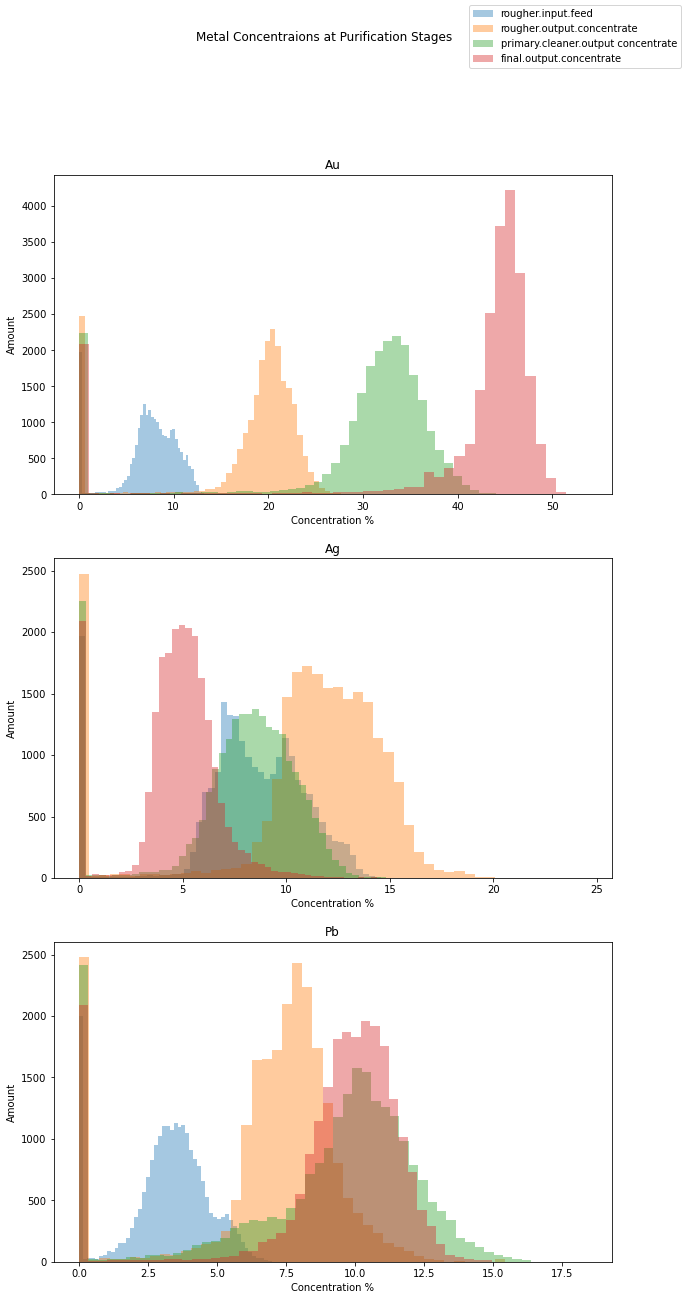

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
for column in (au):
    sns.distplot(au[column], ax=axes[0], kde=False)
axes[0].set(title="Au", xlabel="Concentration %", ylabel="Amount")
for column in (ag):
    sns.distplot(ag[column], ax=axes[1], kde=False)
axes[1].set(title="Ag", xlabel="Concentration %", ylabel="Amount")
for column in (pb):
    sns.distplot(pb[column], ax=axes[2], kde=False)
axes[2].set(title="Pb", xlabel="Concentration %", ylabel="Amount")
fig.suptitle("Metal Concentraions at Purification Stages")
fig.legend(["rougher.input.feed", "rougher.output.concentrate", "primary.cleaner.output concentrate", "final.output.concentrate",])
fig.show()

* The following metals are plotted: Au, Ag, and Pb metal at each different stage of purification. 
* As shown in the first plot measuring gold concentration (Au), we see that gold increases in concentration from the rougher stages to the final output stage of purification. 
* As for Silver (Ag), we observe both and increase and decrease in concentration as the stages of purification progress, resulting in an overall decrease. Lead (Pb) shows a slight increase as the stages of purification progress.

* As for examining the changes in concentration of Pb(lead) and Ag(silver) in the gold concentrate in the rougher, primary and secondary_cleaner purification stages, we observe the following. 
* There appears to be a decrease of Ag concentration from the rougher to the primary cleaner stage, which makes sense because as the gold ore becomes purified, we expect the concentration of metals other than gold to decrease as we get further into the purifcaition stages. 
* However, strangely there is an increase of Ag in the secondary_cleaner stage, which is counter-intuitive. The gold concentration increases from the rougher to the primary cleaner stage and then drops at the secondary cleaner stage.
* Finally, the Pb concentration increases slightly from the rougher concentrate to the primary cleaner concetrate, then decreases in the secondary cleaner tail. 

C:\Users\dsaad\AppData\Local\Temp\ipykernel_16816\2616609803.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


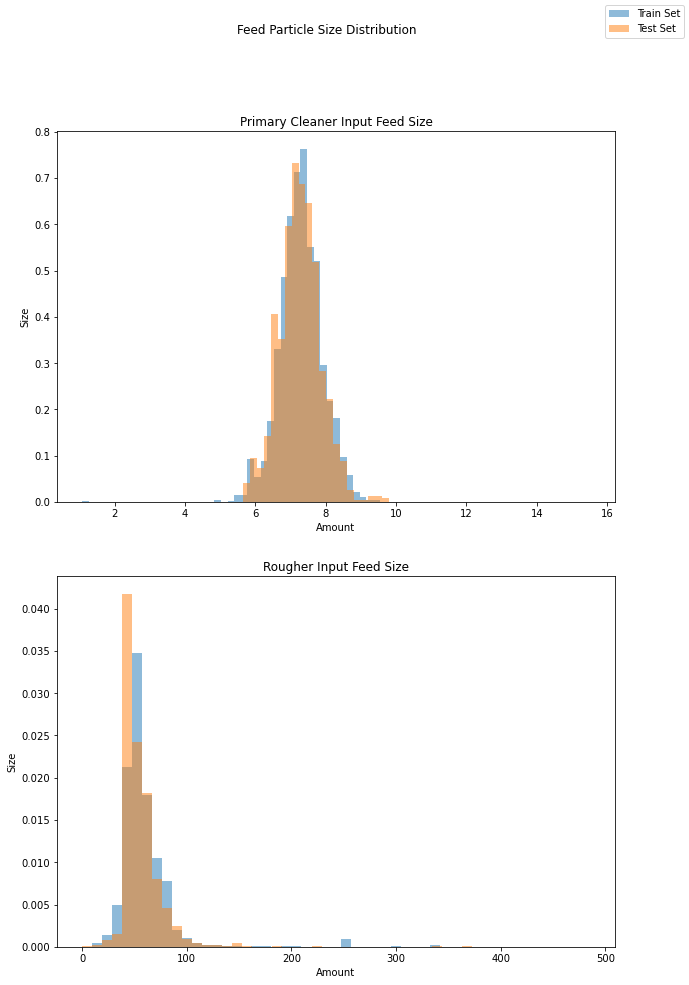

In [21]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))
axes[0].hist(train_set["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].hist(test_set["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].set(title="Primary Cleaner Input Feed Size", xlabel="Amount", ylabel="Size")
axes[1].hist(train_set["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].hist(test_set["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].set(title="Rougher Input Feed Size", xlabel="Amount", ylabel="Size")
fig.suptitle("Feed Particle Size Distribution")
fig.legend(["Train Set", "Test Set"])
fig.show()



* The training set and test set appear to have similar distributions, which will make it more likely for an accurate model evaluation.

In [22]:
def raw_feed(df):
    return df["rougher.input.feed_au"] + df["rougher.input.feed_ag"] + df["rougher.input.feed_pb"] + df["rougher.input.feed_sol"]

In [23]:
def rougher_concentration(df):
    return df["rougher.output.concentrate_au"] + df["rougher.output.concentrate_ag"] + df["rougher.output.concentrate_pb"] + df["rougher.output.concentrate_sol"]

In [24]:
def final_concentration(df):
    return df["final.output.concentrate_au"] + df["final.output.concentrate_ag"] + df["final.output.concentrate_pb"] + df["final.output.concentrate_sol"]

In [25]:
data["rougher.input.feed"] = raw_feed(data)
data["rougher.output.concentrate"] = rougher_concentration(data)
data["final.output.concentrate"] = final_concentration(data)
total_conc = data[["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]]

C:\Users\dsaad\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dsaad\AppData\Local\Temp\ipykernel_16816\1978606837.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


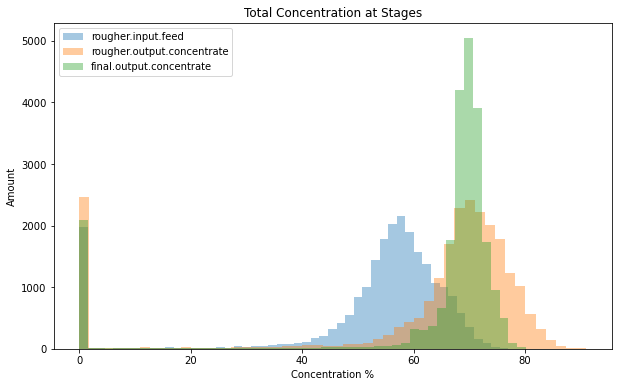

In [26]:
fig = plt.figure(figsize=(10, 6))
for column in (total_conc):
    sns.distplot(total_conc[column], kde=False)
plt.legend((total_conc))
plt.title("Total Concentration at Stages")
plt.xlabel("Concentration %")
plt.ylabel("Amount")
fig.show()

* Above the concentration of all the various metals are plotted at the three different stages.
* The outliers that all distributions of these metals at different stages share appear at concentration percentage of 0. 
* Thus, I will remove all concentration values that fall below 25% in order to increase accuracy of the model.

# 3. Build the model

In [27]:
def smape(y_true, y_pred):
    frac = np.divide(np.abs(y_true - y_pred), (np.abs(y_true)+np.abs(y_pred))/2)
    return np.average(frac, axis=0)


In [28]:
def smape_final(y_true,y_pred):
    smape_out_rougher = smape(y_true[target.index('rougher.output.recovery')], y_pred[target.index('rougher.output.recovery')])
    smape_out_final = smape(y_true[target.index('final.output.recovery')], y_pred[target.index('final.output.recovery')])
    return (0.25*smape_out_rougher + 0.75*smape_out_final) * (-1)

# 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [29]:
new_data=data.loc[data[['rougher.output.recovery', 'final.output.recovery']].index.isin(test_set.index)]
new_data2= new_data[(new_data["rougher.input.feed"] > 20) & (new_data["rougher.output.concentrate"] > 20) & (new_data["final.output.concentrate"] > 20)]
target=new_data2[['rougher.output.recovery', 'final.output.recovery']]
features=new_data2.drop(['rougher.output.recovery', 'final.output.recovery','date'], axis=1)
new_data2=new_data2.drop(['date'], axis=1)
train_set.drop(['date'], axis=1)
train_set.reset_index(drop=True)
new_data2.reset_index(drop=True)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,5.094394,6.814771,4.144998,19.679096,63.222913,8.876979,2.890461,6.265538,4.834333,72.323038,...,-500.160005,8.031940,-404.684579,3.006402,-189.563378,19.989903,-490.766552,51.659169,78.140015,35.733258
5090,6.866588,9.693017,7.057738,41.911733,56.013663,8.799615,3.072426,7.778921,4.795586,87.531145,...,-501.324937,7.922198,-558.379055,3.014796,-390.767740,19.968139,-512.330776,56.549176,74.620900,65.529075
5091,6.491099,8.971856,8.243707,44.402961,59.523458,9.050118,3.175584,8.366540,4.710460,114.621926,...,-499.883726,7.806507,-504.206025,3.023191,-499.440890,19.975593,-500.193764,58.787889,73.780597,68.109624
5092,5.529610,8.780238,8.670487,46.518640,60.686787,9.473990,3.239447,8.964319,4.551176,127.300389,...,-500.445413,8.144849,-500.613212,3.031585,-499.857956,20.057007,-500.409204,61.422730,73.411885,69.498975


In [30]:
smape_score = make_scorer(smape_final, greater_is_better=False)

In [31]:
target = ['rougher.output.recovery', 'final.output.recovery']
features = (set(train_set.columns).intersection(set(test_set.columns)).difference(set(target)))

In [32]:
features.remove('date')

# Split Data

In [33]:
X_train, X_test = train_set[features].values, new_data2[features].values
y_train, y_test = train_set[target].values, new_data2[target].values

C:\Users\dsaad\AppData\Local\Temp\ipykernel_16816\1732967104.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test = train_set[features].values, new_data2[features].values
C:\Users\dsaad\AppData\Local\Temp\ipykernel_16816\1732967104.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test = train_set[features].values, new_data2[features].values


Before training any models, I will train a constant model to use as a baseline to compare to the other models:

# Constant Model

In [34]:
dm = DummyRegressor(strategy='mean').fit(X_train, y_train)
y_pred = dm.predict(X_test)
print('smape:', smape_final(y_test, y_pred))

smape: -0.06273367638740446


# Linear Regression Model


In [35]:
model1 = LinearRegression().fit(X_train, y_train)
model1.fit(X_train, y_train)
scores_model1 = cross_val_score(model1, X_train, y_train, cv=5, scoring=smape_score)
print("mean smape:", scores_model1.mean())
scores_model1

mean smape: 0.12038203930857742


array([0.06444214, 0.04338465, 0.0303675 , 0.0312694 , 0.43244651])

# DecisionTree Model 

In [36]:
random_state=np.random.RandomState(12345)
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
scores= {}
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model2 = DecisionTreeRegressor(random_state=random_state, max_depth=depth)
        model2.fit(X_train, y_train)
        model2_scores=cross_val_score(model2, X_train, y_train, cv=5, scoring=smape_score)
        result=model2_scores.mean()
        if result < best_result:
            best_model = model2
            best_result = result
            best_depth = depth

In [37]:
print("DecisionTreeRegressor mean smape score:", result)
print(best_depth)

DecisionTreeRegressor mean smape score: 0.03454139307783659
10


In [38]:
model3=RandomForestRegressor(random_state=random_state)

In [ ]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
scores= {}
for est in range(50, 100):
    for depth in range (1, 11):
        model3 = RandomForestRegressor(random_state=random_state, n_estimators=est, max_depth=depth)
        model3.fit(X_train, y_train)
        model3_scores=cross_val_score(model3, X_train, y_train, cv=5, scoring=smape_score)
        result2=model3_scores.mean()
        if result2 < best_result:
            best_model = model3
            best_result = result2
            best_est = est
            best_depth = depth


In [ ]:
print(result2)

* Below, I will evaluate the final model (DecisonTree Regressor, max_depth=4) using the test set:

In [ ]:
best_model=DecisionTreeRegressor(random_state=random_state, max_depth=4)
best_model.fit(X_train, y_train)
y_pred_best= best_model.predict(X_test)
print('smape:', smape_final(y_test, y_pred_best))


# Conclusion

* The model that resulted in the best average smape score was the DecisionTreeRegressor (max_depth=10) model, resulting in an average smape score of 0.0345, as compared the other two models (LinearRegression(), average smape=0.1203) and RandomForestRegressor(), average_smape=0.0719)